# Predictive Modeling for Body Fat Estimation

The **Predictive Modeling for Body Fat Estimation** model was built using the **Random Forest** algorithm to analyze human body data and predict body fat percentage based on various physical features such as **weight, height, age**, and more. This model aims to provide accurate estimates of body fat percentage based on different inputs collected from individuals.

## Approach:
- The dataset contains a variety of physical features such as **sex, age, weight, height, neck, chest** circumference, and many other body measurements.
- The **Random Forest algorithm** was chosen due to its ability to handle complex data and non-linear relationships between variables.

## Model Development Stages:
1. **Data Preprocessing:** The data was cleaned and non-usable values were transformed, including converting **categorical variables** like **sex** into numerical values (e.g., 0 for female and 1 for male).
2. **Data Augmentation:** Techniques were used to generate additional data in order to improve model accuracy and expand the training set.
3. **Performance Analysis:** The model was evaluated using various metrics such as **F1-Score**, **Precision**, and **Recall**, allowing us to assess the model's performance in predicting body fat percentage across different categories.

## Performance:
- The model was tested using unseen test data and achieved strong results in predicting body fat percentage, providing **acceptable accuracy** in categorizing individuals into groups such as "Essential Fat", "Athletes", and "Average".
  
## Outputs:
- The model can take **physical inputs** such as **weight** and **age** to predict the **body fat category**, helping to classify individuals into healthy categories or those who may need lifestyle adjustments.


### Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

### Data Reading

In [2]:
not_shuffled_body_f = pd.read_table('BodyFat - Extended.csv', delimiter=',')
not_shuffled_body_f.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## **Data Preprocessing**

Data preprocessing is the process of preparing raw data for machine learning models. Key steps include:

1. **Handling Missing Data**: Managing missing or null values by removing or filling them with mean/median values.
2. **Encoding Categorical Variables**: Converting categorical data (e.g., gender) into numeric values (e.g., "M" to 1, "F" to 0).
3. **Data Augmentation**: Increasing the diversity of the data by generating synthetic samples, especially useful when the dataset is small.
4. **Outlier Detection**: Identifying and handling outliers to prevent distortion in the model.
5. **Splitting the Data**: Dividing data into training and testing sets for model evaluation.

These steps help ensure clean, consistent, and balanced data for optimal model performance.


In [3]:
not_shuffled_body_f['Sex'] = not_shuffled_body_f['Sex'].map({
    'M': 1,
    'F': 0
})

In [4]:
not_shuffled_body_f.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,1,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,1,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,1,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,1,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,1,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
not_shuffled_data = not_shuffled_body_f.drop('Original', axis=1)

In [6]:
not_shuffled_data.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,1,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [7]:
not_shuffled_data.shape

(436, 15)

### Data Augmentation with Interpolation:

I used **Data Augmentation** to increase the size of the dataset by creating new samples. This was done through **Interpolation**, which combines two existing data points to generate a new one. By doing this, I was able to create additional data points, helping the model learn better from more diverse examples.


In [8]:
def generate_interpolated_data(df, num_samples):
    new_rows = []
    for _ in range(num_samples):
        
        row1, row2 = df.sample(2).values
        
        alpha = np.random.uniform(0, 1)
        
        new_row = row1 * alpha + row2 * (1 - alpha)
        
        new_rows.append(new_row)
    
    return pd.DataFrame(new_rows, columns=df.columns)
    

num_samples = 5564 

numeric_data = not_shuffled_data.select_dtypes(include=[np.number])

interpolated_data = generate_interpolated_data(numeric_data, num_samples)

not_shuffled_augmented_data = pd.concat([not_shuffled_data, interpolated_data], axis=0).reset_index(drop=True)

In [9]:
not_shuffled_augmented_data.shape

(6000, 15)

In [10]:
not_shuffled_augmented_data.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,1.0,23.0,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1.0,22.0,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1.0,22.0,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1.0,26.0,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1.0,24.0,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [11]:
not_shuffled_augmented_data['Sex'] = not_shuffled_augmented_data['Sex'].astype(int)
not_shuffled_augmented_data['Age'] = not_shuffled_augmented_data['Age'].astype(int)

In [12]:
not_shuffled_augmented_data.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,1,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,1,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,1,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,1,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,1,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Linear Interpolation between Data Points for Data Augmentation

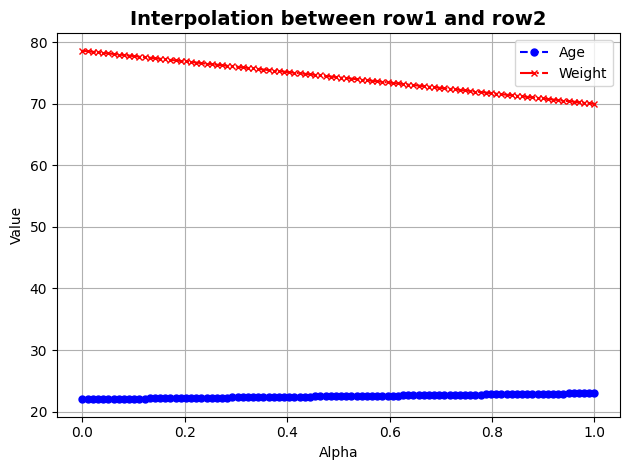

In [13]:
row1 = not_shuffled_augmented_data['Age'].iloc[0], not_shuffled_augmented_data['Weight'].iloc[0]
row2 = not_shuffled_augmented_data['Age'].iloc[1], not_shuffled_augmented_data['Weight'].iloc[1]

alpha_values = np.linspace(0, 1, 100)   
interpolated_rows = []

for alpha in alpha_values:
    new_row = np.array(row1) * alpha + np.array(row2) * (1 - alpha)
    interpolated_rows.append(new_row)

interpolated_rows = np.array(interpolated_rows)

plt.plot(alpha_values, interpolated_rows[:, 0], 'b--', label='Age',  marker='o', markersize=5)
plt.plot(alpha_values, interpolated_rows[:, 1], 'r-.', label='Weight', marker='x', markersize=5)

plt.title(f'Interpolation between row1 and row2', fontsize=14, weight='bold')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

## Shuffiled Data

In [14]:
data_body_f = not_shuffled_augmented_data.sample(frac=1, random_state=42)
data_body_f.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1782,23.426522,0,36,79.610425,1.825116,36.632681,92.496903,87.123425,100.318050,61.441901,39.746529,23.897686,32.109221,28.126914,17.715379
3917,18.322316,0,32,60.542548,1.642740,33.663487,89.007263,73.665149,94.903523,52.393153,35.112448,21.587552,28.707263,26.101247,15.769503
221,26.000000,1,54,104.330000,1.840000,42.500000,119.900000,110.400000,105.500000,64.200000,42.700000,27.000000,38.400000,32.000000,19.600000
2135,6.632835,0,25,70.095475,1.790689,35.144999,89.149061,78.052340,96.500000,54.132810,36.318437,22.118437,29.830625,27.471561,17.405156
5224,7.785728,1,36,60.232788,1.712857,36.142864,88.971385,75.285633,85.828509,51.614296,34.742852,21.442852,29.014249,27.257112,16.628556


In [15]:
data_body_f[['BodyFat', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
             'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']] = data_body_f[['BodyFat', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
             'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']].round(2)

In [16]:
data_body_f.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1782,23.43,0,36,79.61,1.83,36.63,92.50,87.12,100.32,61.44,39.75,23.90,32.11,28.13,17.72
3917,18.32,0,32,60.54,1.64,33.66,89.01,73.67,94.90,52.39,35.11,21.59,28.71,26.10,15.77
221,26.00,1,54,104.33,1.84,42.50,119.90,110.40,105.50,64.20,42.70,27.00,38.40,32.00,19.60
2135,6.63,0,25,70.10,1.79,35.14,89.15,78.05,96.50,54.13,36.32,22.12,29.83,27.47,17.41
5224,7.79,1,36,60.23,1.71,36.14,88.97,75.29,85.83,51.61,34.74,21.44,29.01,27.26,16.63


In [17]:
data_body_f.describe()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,20.269973,0.354167,33.900167,72.461193,1.735052,35.252888,94.139892,82.812867,98.744180,56.104993,37.385857,22.370598,29.906677,26.487387,17.144698
std,6.297534,0.478300,12.609601,12.980710,0.081482,3.185869,9.276397,12.226409,5.816321,5.212188,2.339895,1.493727,3.290348,2.627832,1.315477
min,0.000000,0.000000,1.000000,42.180000,0.750000,26.000000,43.000000,58.000000,82.500000,38.000000,24.700000,18.000000,20.500000,20.000000,13.500000
25%,16.170000,0.000000,22.000000,62.870000,1.680000,32.620000,87.480000,72.857500,94.957500,52.440000,35.740000,21.420000,27.470000,24.400000,16.150000
50%,20.500000,0.000000,32.000000,71.360000,1.730000,35.220000,93.530000,82.090000,98.370000,55.950000,37.380000,22.280000,29.790000,26.530000,17.220000
75%,24.502500,1.000000,43.000000,80.432500,1.790000,37.712500,100.042500,91.330000,102.002500,59.350000,38.890000,23.200000,32.170000,28.540000,18.180000
max,47.500000,1.000000,81.000000,164.720000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [18]:
data_body_f.isnull().sum()

BodyFat    0
Sex        0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [19]:
data_body_f.duplicated().sum()

np.int64(3)

In [20]:
duplicates = data_body_f[data_body_f.duplicated()]
print(duplicates)

      BodyFat  Sex  Age  Weight  Height   Neck  Chest  Abdomen    Hip  Thigh  \
372      20.7    0   21   56.25    1.69  31.50  84.00    65.00  94.50  49.50   
4089     18.4    0   46   72.71    1.73  36.18  97.78    83.07  98.91  57.62   
160       9.4    1   31   68.61    1.84  35.00  94.00    81.20  91.50  52.50   

       Knee  Ankle  Biceps  Forearm  Wrist  
372   33.00  20.00   26.30    23.50  15.30  
4089  37.02  22.09   31.87    27.91  17.85  
160   36.60  21.00   27.00    26.30  16.50  


In [22]:
data_body_f = data_body_f.drop(index=[160, 372, 4089])

In [23]:
data_body_f.duplicated().sum()

np.int64(0)

In [24]:
x = data_body_f[['Sex', 'Age', 'Weight', 'Height', 'Neck',
       'Chest', 'Abdomen', 'Hip', 'Knee', 'Wrist']]
y = data_body_f['BodyFat']

In [25]:
y.value_counts()

BodyFat
22.20    12
18.49    11
22.45    11
22.11    10
19.60    10
         ..
12.96     1
13.17     1
34.08     1
37.98     1
11.05     1
Name: count, Length: 2307, dtype: int64

### 

### **Regression Model**

In this section, we leverage the **Random Forest Regressor** to predict **body fat percentage** as a continuous value based on various features, including **age**, **weight**, **height**, and other key measurements. The model is trained to capture the relationships between these features and the target value (body fat percentage) and is evaluated on its ability to make accurate predictions.

- **Model Training**:
  - The **Random Forest Regressor** is trained on a set of input features such as **age**, **weight**, **height**, and other relevant measurements.
  - During training, the model learns the complex relationships between these features and the body fat percentage to make informed predictions for new data points.

- **Model Evaluation**:
  - To assess the model's performance, we utilize metrics like **Mean Squared Error (MSE)** and the **R² score**.
  - The **R² score** measures how well the model explains the variance in the body fat percentage, with a higher value indicating a better fit to the data.
  - **Cross-validation** is used to evaluate the model's robustness and ensure it generalizes well to unseen data, reducing the risk of overfitting.

This regression approach aims to provide accurate and reliable predictions of body fat percentage, offering valuable insights into the continuous relationship between physical attributes and body composition.


### Feature Scaling and Splitting dataset

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Evaluating the Impact of Number of Trees on MSE in Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

n_estimators_list = [100, 200, 300, 500, 1000,1500,2000]
mse_values = []
 
for n_estimators in n_estimators_list:
    temp_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    temp_model.fit(x_train, y_train)
    y_pred = temp_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

best_n_estimators = n_estimators_list[mse_values.index(min(mse_values))]
best_mse = min(mse_values)

In [28]:
print(best_n_estimators)

500


In [29]:
print(best_mse)

7.516639678582874


### Illustration

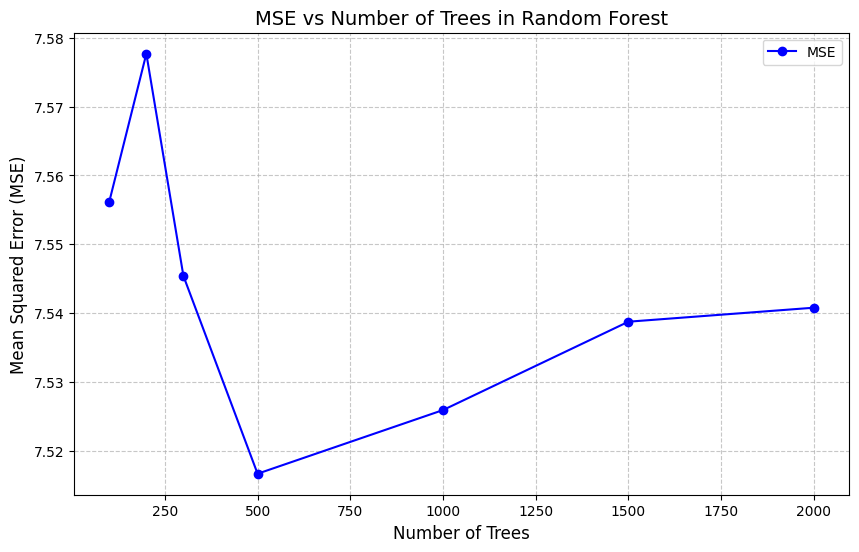

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-', color='blue', label='MSE')
plt.title('MSE vs Number of Trees in Random Forest', fontsize=14)
plt.xlabel('Number of Trees', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Building Random Forest Regressor Model

In [31]:
rfr_model = RandomForestRegressor(n_estimators=500, random_state=42)

rfr_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [32]:
y_pred = rfr_model.predict(x_test)

### Actual vs Predicted Body Fat: Visualizing Model Performance

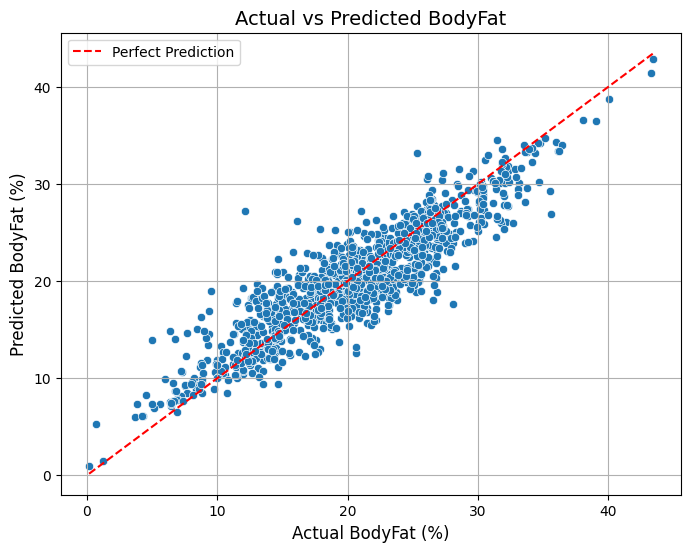

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted BodyFat', fontsize=14)
plt.xlabel('Actual BodyFat (%)', fontsize=12)
plt.ylabel('Predicted BodyFat (%)', fontsize=12)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

### Predict New Data

In [34]:
new_data = pd.DataFrame({'Sex': [1], 'Age': [23], 'Weight': [69.97], 'Height': [1.72], 'Neck': [36.2], 'Chest': [93.1],
                         'Abdomen': [85.2], 'Hip': [94.5], 'Knee': [37.3], 'Wrist': [17.1]})
predicted_val = rfr_model.predict(new_data)
print(predicted_val)

[13.22116]


In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 7.52


In [37]:
print(f"R² Score: {r2:.2f}")

R² Score: 0.82


### Comparing R² Scores for Training and Test Data

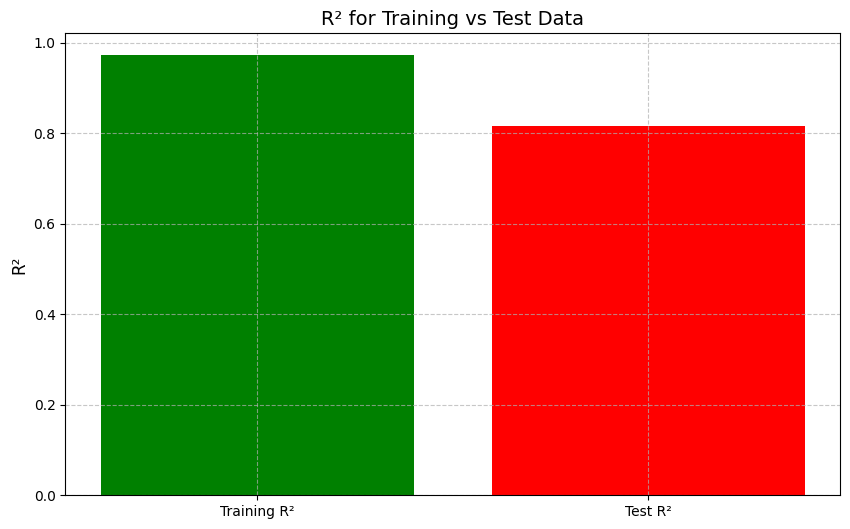

Training R²: 0.9721
Test R²: 0.8166


In [38]:
r2_train = rfr_model.score(x_train, y_train)
r2_test = r2_score(y_test, rfr_model.predict(x_test))

plt.figure(figsize=(10, 6))
plt.bar(['Training R²', 'Test R²'], [r2_train, r2_test], color=['green', 'red'])
plt.title('R² for Training vs Test Data', fontsize=14)
plt.ylabel('R²', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


print(f'Training R²: {r2_train:.4f}')
print(f'Test R²: {r2_test:.4f}')

In [40]:
from sklearn.model_selection import cross_val_score

cvr_scores = cross_val_score(rfr_model, x, y, cv=5, scoring='r2')
print(f'Cross-Validation Mean R²: {cvr_scores.mean():.4f}')

Cross-Validation Mean R²: 0.7967


### Cross-Validation R² Scores: Evaluating Model Performance Across Folds

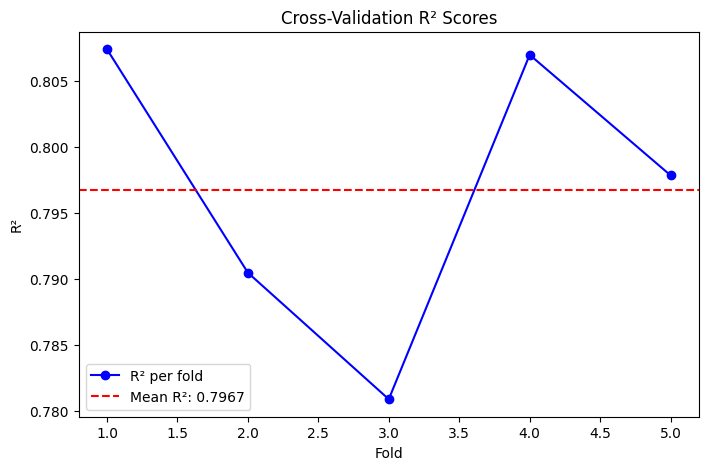

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cvr_scores, marker='o', linestyle='-', color='b', label='R² per fold')
plt.axhline(y=cvr_scores.mean(), color='r', linestyle='--', label=f'Mean R²: {cvr_scores.mean():.4f}')
plt.title('Cross-Validation R² Scores')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()
plt.show()

### Visualizing Feature Importance in Random Forest Model

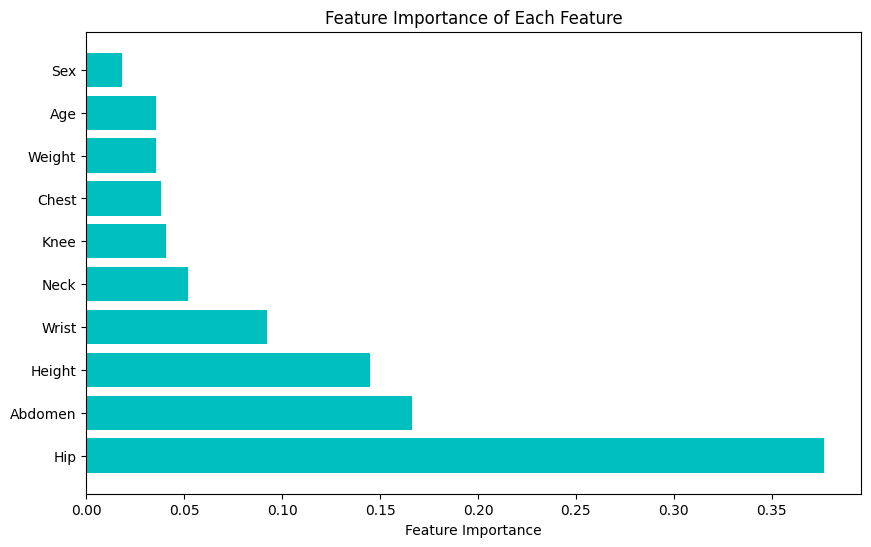

In [42]:
importances = rfr_model.feature_importances_
features = x.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], align='center', color='c')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Each Feature')
plt.show()

## **Next Step**


After using the **Random Forest Regressor** to predict body fat percentage, the next step is categorizing the body fat values based on **gender** and **percentage**. The body fat percentages are classified into different categories such as "Essential Fat", "Athletes", "Fitness", and "Obese" according to established thresholds for each gender.

- **For Men**:
  - Essential Fat: 2-5%
  - Athletes: 6-13%
  - Fitness: 14-17%
  - Average: 18-24%
  - Obese: >24%

- **For Women**:
  - Essential Fat: 10-13%
  - Athletes: 14-20%
  - Fitness: 21-24%
  - Average: 25-31%
  - Obese: >31%

After categorization, The **Random Forest Classifier** is then used to classify the body fat category based on features such as **sex**, **age**, and **weight**, and performance is evaluated using metrics like **accuracy**, **precision**, **recall**, and **F1-Score**.

### **Model Evaluation and Performance**:

- The model is evaluated on both **training** and **test** datasets using the **R² score**.
- **Cross-validation** is used to validate the model's performance and assess its stability.
- **Feature importance** is visualized to understand which features (e.g., weight, height) contribute most to predicting body fat percentage and classification.



### Categorizing Body Fat Based on Gender and Percentage

In [43]:
data_body_f['Sex'] = data_body_f['Sex'].map({
    0:'F',
    1:'M'
})

In [44]:
def categorize_body_fat(body_fat, gender):
    if gender == 'M':
        if 2 <= body_fat <= 5:
            return 'Essential fat'
        elif 6 <= body_fat <= 13:
            return 'Athletes'
        elif 14 <= body_fat <= 17:
            return 'Fitness'
        elif 18 <= body_fat <= 24:
            return 'Average'    
        else:
            return 'Obese'
    elif gender == 'F':
        if 10 <= body_fat <= 13:
            return 'Essential fat'
        elif 14 <= body_fat <= 20:
            return 'Athletes'
        elif 21 <= body_fat <= 24:
            return 'Fitness'
        elif 25 <= body_fat <= 31:
            return 'Average'    
        else:
            return 'Obese'
    else:
        return 'Unknown'

data_body_f['BodyFat'] = data_body_f.apply(
    lambda row: categorize_body_fat(row['BodyFat'], row['Sex']),
    axis=1
)

In [45]:
data_body_f.head()

,BodyFat,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
1782,Fitness,F,36,79.61,1.83,36.63,92.50,87.12,100.32,61.44,39.75,23.90,32.11,28.13,17.72
3917,Athletes,F,32,60.54,1.64,33.66,89.01,73.67,94.90,52.39,35.11,21.59,28.71,26.10,15.77
221,Obese,M,54,104.33,1.84,42.50,119.90,110.40,105.50,64.20,42.70,27.00,38.40,32.00,19.60
2135,Obese,F,25,70.10,1.79,35.14,89.15,78.05,96.50,54.13,36.32,22.12,29.83,27.47,17.41
5224,Athletes,M,36,60.23,1.71,36.14,88.97,75.29,85.83,51.61,34.74,21.44,29.01,27.26,16.63


### Visualization of Body Fat Class Distribution

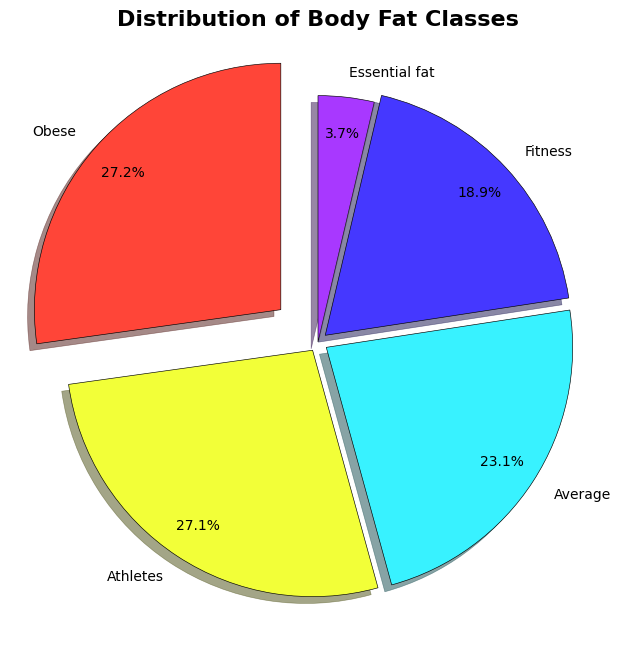

In [46]:
bf_class_counts = data_body_f['BodyFat'].value_counts(normalize=True)

colors = ['#ff4538', '#f2ff38', '#38f2ff', '#4538ff', '#a838ff'] 
explode_values = (0.2, .04, .04, .04, 0)
plt.figure(figsize=(8, 8))
bf_class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors= colors,    
                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.45},
                      pctdistance=0.85,         
                      shadow=True,           
                      explode=explode_values) 
plt.title('Distribution of Body Fat Classes', fontsize=16, weight='bold')
plt.ylabel('')
plt.show()

In [47]:
data_body_f['Sex'] = data_body_f['Sex'].map({
    "F":0,
    "M":1
})

### Evaluating Model Performance: F1-Score, Precision, and Recall vs Number of Trees

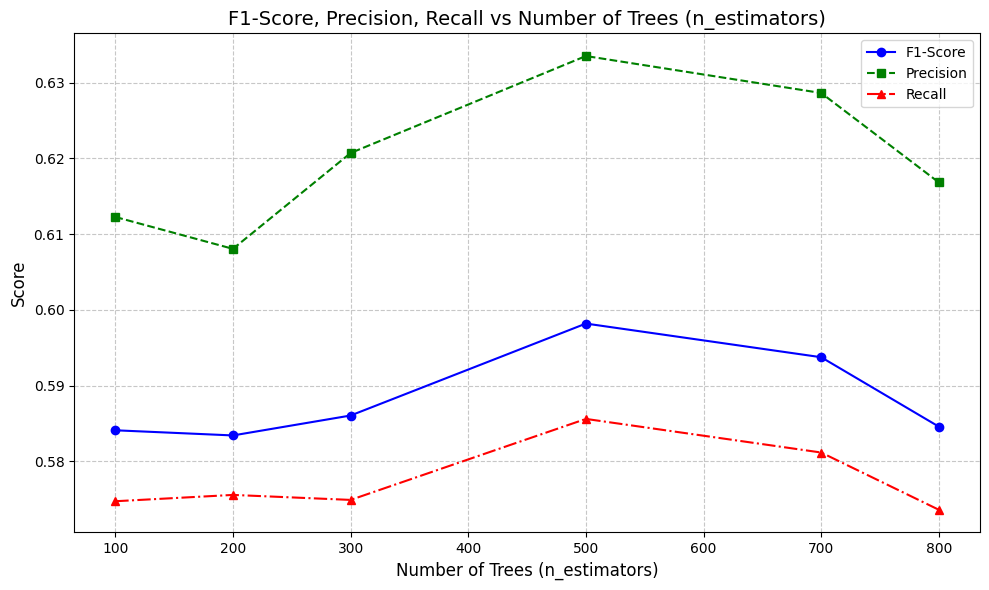

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

xc = data_body_f[['Sex', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Knee', 'Wrist']]
yc = data_body_f['BodyFat']

xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, test_size=0.2, random_state=42)

n_estimators_list = [100, 200, 300, 500, 700, 800]
f1_scores = []
precisions = []
recalls = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(xc_train, yc_train)
    yc_pred = model.predict(xc_test)
    
    f1 = f1_score(yc_test, yc_pred, average='macro')
    precision = precision_score(yc_test, yc_pred, average='macro', zero_division=1)  
    recall = recall_score(yc_test, yc_pred, average='macro', zero_division=1)
    
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

plt.figure(figsize=(10, 6))

plt.plot(n_estimators_list, f1_scores, marker='o', linestyle='-', color='blue', label='F1-Score')
plt.plot(n_estimators_list, precisions, marker='s', linestyle='--', color='green', label='Precision')
plt.plot(n_estimators_list, recalls, marker='^', linestyle='-.', color='red', label='Recall')

plt.title('F1-Score, Precision, Recall vs Number of Trees (n_estimators)', fontsize=14)
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Building Random Forest Classifier Model

In [49]:
rfc_model = RandomForestClassifier(n_estimators=500, random_state=42)
rfc_model.fit(xc_train, yc_train)

RandomForestClassifier(n_estimators=500, random_state=42)

### Visualizing Feature Importance in Random Forest Model

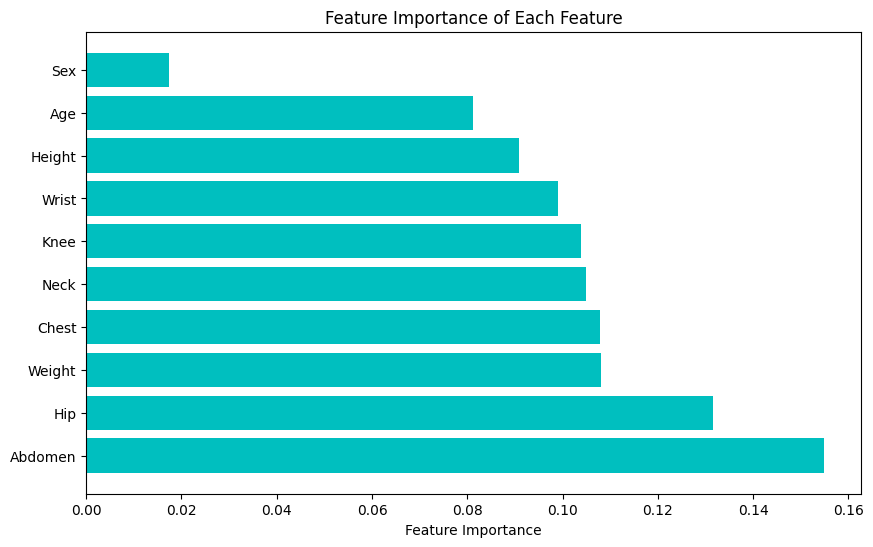

In [50]:
importances = rfc_model.feature_importances_

features = xc.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], align='center', color='c')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Each Feature')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

yc_pred = rfc_model.predict(xc_test)
accuracy = accuracy_score(yc_test, yc_pred)

In [52]:
print(accuracy)

0.6158333333333333


### Predict New Data

In [53]:
predicted_class = rfc_model.predict(new_data)
print(predicted_class)

['Athletes']


### Confusion Matrix

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

yc_train_pred = cross_val_predict(rfc_model,xc_train,yc_train,cv=3)
confusion_matrix(yc_train,yc_train_pred)

array([[1030,   42,    8,  134,   89],
       [  67,  788,    0,  110,  158],
       [ 104,    0,   40,    8,   33],
       [ 251,  170,    1,  425,   74],
       [ 296,  273,   19,  151,  526]])

### Precision, Recall, and F1-Score for Model Evaluation

In [55]:
yc_pred = rfc_model.predict(xc_test)
precision = precision_score(yc_test, yc_pred, average=None) 
recall = recall_score(yc_test, yc_pred, average=None)   
f1 = f1_score(yc_test, yc_pred, average=None)

In [56]:
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-Score for each class:", f1)

Precision for each class: [0.6044226  0.6459854  0.72727273 0.47826087 0.71161049]
Recall for each class: [0.76875    0.66792453 0.45714286 0.51643192 0.51771117]
F1-Score for each class: [0.67675378 0.6567718  0.56140351 0.496614   0.59936909]


### Macro-Averaged Precision, Recall, and F1-Score

In [57]:
precision_macro = precision_score(yc_test, yc_pred, average='macro') 
recall_macro = recall_score(yc_test, yc_pred, average='macro')
f1_macro = f1_score(yc_test, yc_pred, average='macro')

In [58]:
print(f"Precision (Macro): {precision_macro}")
print(f"Recall (Macro): {recall_macro}")
print(f"F1-Score (Macro): {f1_macro}")

Precision (Macro): 0.6335104179223577
Recall (Macro): 0.5855920963978997
F1-Score (Macro): 0.5981824343456404


In [59]:
import joblib

joblib.dump(rfr_model, 'random_forest_model.pkl')

['random_forest_model.pkl']